Завдання на практичну роботу "Deep Learning Regression":

Завдання:

Створіть власний набір даних для регресії.
Спробуйте побудувати нейронну мережу з трьома повнозв'язними шарами (Dense layers) та навчити її на вашому власному наборі даних для регресії (200 епох). Оцініть її ефективність.
Спробуйте покращити результати, використовуючи такі підходи:
Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).
Збільшення кількості нейронів у кожному шарі.
Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?
Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?
Знайдіть відповідний код та побудуйте графік зміни функції втрат на тренувальному та тестувальному наборі даних під час тренування останньої моделі.


Створіть власний набір даних для регресії.

In [9]:
import numpy as np
import pandas as pd

# Створення власного набору даних для регресії
np.random.seed(42)
num_samples = 1000
num_features = 5

from sklearn.datasets import make_regression
X, y = make_regression(n_samples=num_samples, n_features=num_features, n_informative=3, noise=15, random_state=42)

# Збереження даних у файл
data = pd.DataFrame(np.column_stack([X, y]), columns=[f"Feature{i+1}" for i in range(num_features)] + ['Target'])
data.to_csv('regression_dataset.csv', index=False)


In [10]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова базової моделі з трьома Dense шарами
model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
model.compile(optimizer='adam', loss='mae', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності базової моделі
train_loss = model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних:", train_loss)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних:", test_loss)




Epoch 1/200


25/25 [==============================] - 2s 16ms/step - loss: 44.7686 - mae: 44.7686 - val_loss: 43.3815 - val_mae: 43.3815
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 44.2198 - mae: 44.2198 - val_loss: 42.6547 - val_mae: 42.6547
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 43.1720 - mae: 43.1720 - val_loss: 41.2947 - val_mae: 41.2947
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 41.2612 - mae: 41.2612 - val_loss: 38.8629 - val_mae: 38.8629
Epoch 5/200
25/25 [==============================] - 0s 5ms/step - loss: 38.1139 - mae: 38.1139 - val_loss: 35.0711 - val_mae: 35.0711
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 33.3252 - mae: 33.3252 - val_loss: 30.5359 - val_mae: 30.5359
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 27.9664 - mae: 27.9664 - val_loss: 26.5845 - val_mae: 26.5845
Epoch 8/200
25/25 [==============================

Побудова більшої моделі (як поводиться модель з чотирма повнозв'язними шарами?).

In [11]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Побудова більшої моделі з чотирма Dense шарами
larger_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
larger_model.compile(optimizer='adam', loss='mae', metrics=['mae'])
larger_history = larger_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності більшої моделі
train_loss = larger_model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більша модель):", train_loss)
test_loss = larger_model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більша модель):", test_loss)


Epoch 1/200
25/25 [==============================] - 2s 15ms/step - loss: 44.4868 - mae: 44.4868 - val_loss: 42.4273 - val_mae: 42.4273
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 40.1933 - mae: 40.1933 - val_loss: 33.0278 - val_mae: 33.0278
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 22.8966 - mae: 22.8966 - val_loss: 16.7606 - val_mae: 16.7606
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 14.1570 - mae: 14.1570 - val_loss: 13.6339 - val_mae: 13.6339
Epoch 5/200
25/25 [==============================] - 0s 6ms/step - loss: 13.1821 - mae: 13.1821 - val_loss: 13.4854 - val_mae: 13.4854
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 12.6926 - mae: 12.6926 - val_loss: 12.9581 - val_mae: 12.9581
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 13.0283 - mae: 13.0283 - val_loss: 13.5367 - val_mae: 13.5367
Epoch 8/200
25/25 [==============================] - 0

Збільшення кількості нейронів у кожному шарі.

In [12]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Збільшення кількості нейронів у кожному шарі
model_with_more_neurons = Sequential([
    Dense(128, activation='relu', input_shape=(X.shape[1],)),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох
model_with_more_neurons.compile(optimizer='adam', loss='mae', metrics=['mae'])
more_neurons_history = model_with_more_neurons.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з більшою кількістю нейронів
train_loss_more_neurons = model_with_more_neurons.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більше нейрони):", train_loss_more_neurons)
test_loss_more_neurons = model_with_more_neurons.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більше нейрони):", test_loss_more_neurons)


Epoch 1/200
25/25 [==============================] - 1s 14ms/step - loss: 44.5379 - mae: 44.5379 - val_loss: 42.5457 - val_mae: 42.5457
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 41.4509 - mae: 41.4509 - val_loss: 36.3985 - val_mae: 36.3985
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 30.0321 - mae: 30.0321 - val_loss: 20.1900 - val_mae: 20.1900
Epoch 4/200
25/25 [==============================] - 0s 5ms/step - loss: 16.7400 - mae: 16.7400 - val_loss: 14.0063 - val_mae: 14.0063
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 13.2262 - mae: 13.2262 - val_loss: 13.2247 - val_mae: 13.2247
Epoch 6/200
25/25 [==============================] - 0s 5ms/step - loss: 12.8343 - mae: 12.8343 - val_loss: 13.5382 - val_mae: 13.5382
Epoch 7/200
25/25 [==============================] - 0s 5ms/step - loss: 12.6601 - mae: 12.6601 - val_loss: 12.9244 - val_mae: 12.9244
Epoch 8/200
25/25 [==============================] - 0

Ознайомтеся з документацією Adam та з'ясуйте, що являє собою перший параметр. Які зміни відбудуться, якщо збільшити його в 10 разів?

In [13]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Збільшення параметра learning_rate в 10 разів
larger_learning_rate_model = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 200 епох з новим learning_rate
larger_learning_rate_model.compile(optimizer=Adam(learning_rate=0.01), loss='mae', metrics=['mae'])
larger_learning_rate_history = larger_learning_rate_model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з більшим learning_rate
train_loss_larger_lr = larger_learning_rate_model.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (більший learning_rate):", train_loss_larger_lr)
test_loss_larger_lr = larger_learning_rate_model.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (більший learning_rate):", test_loss_larger_lr)


Epoch 1/200
25/25 [==============================] - 1s 15ms/step - loss: 39.2247 - mae: 39.2247 - val_loss: 24.6405 - val_mae: 24.6405
Epoch 2/200
25/25 [==============================] - 0s 5ms/step - loss: 17.1168 - mae: 17.1168 - val_loss: 14.8987 - val_mae: 14.8987
Epoch 3/200
25/25 [==============================] - 0s 5ms/step - loss: 13.6538 - mae: 13.6538 - val_loss: 14.1057 - val_mae: 14.1057
Epoch 4/200
25/25 [==============================] - 0s 6ms/step - loss: 13.2871 - mae: 13.2871 - val_loss: 13.1816 - val_mae: 13.1816
Epoch 5/200
25/25 [==============================] - 0s 7ms/step - loss: 12.7738 - mae: 12.7738 - val_loss: 13.0219 - val_mae: 13.0219
Epoch 6/200
25/25 [==============================] - 0s 6ms/step - loss: 12.7416 - mae: 12.7416 - val_loss: 14.4308 - val_mae: 14.4308
Epoch 7/200
25/25 [==============================] - 0s 6ms/step - loss: 12.8135 - mae: 12.8135 - val_loss: 12.5140 - val_mae: 12.5140
Epoch 8/200
25/25 [==============================] - 0

Які будуть результати, якщо тренування проводити довше (наприклад, 300 епох замість 200)?

In [14]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import pandas as pd

# Зчитування даних з файлу
data = pd.read_csv('regression_dataset.csv')

# Розділення на ознаки та цільову змінну
X = data.drop('Target', axis=1).values
y = data['Target'].values

# Розділення на тренувальні та тестові вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Модель з трьома Dense шарами
model_300_epochs = Sequential([
    Dense(64, activation='relu', input_shape=(X.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Компіляція та тренування моделі протягом 300 епох
model_300_epochs.compile(optimizer='adam', loss='mae', metrics=['mae'])
history_300_epochs = model_300_epochs.fit(X_train, y_train, epochs=300, validation_data=(X_test, y_test))

# Оцінка ефективності моделі з тривалішим тренуванням
train_loss_300_epochs = model_300_epochs.evaluate(X_train, y_train, verbose=0)
print("\nВтрати навчання (MAE) на тренувальних даних (300 епох):", train_loss_300_epochs)
test_loss_300_epochs = model_300_epochs.evaluate(X_test, y_test, verbose=0)
print("Тестові втрати (MAE) на тестових даних (300 епох):", test_loss_300_epochs)


Epoch 1/300
25/25 [==============================] - 1s 11ms/step - loss: 44.7296 - mae: 44.7296 - val_loss: 43.3514 - val_mae: 43.3514
Epoch 2/300
25/25 [==============================] - 0s 4ms/step - loss: 44.1527 - mae: 44.1527 - val_loss: 42.6294 - val_mae: 42.6294
Epoch 3/300
25/25 [==============================] - 0s 4ms/step - loss: 43.0885 - mae: 43.0885 - val_loss: 41.2896 - val_mae: 41.2896
Epoch 4/300
25/25 [==============================] - 0s 4ms/step - loss: 41.1522 - mae: 41.1522 - val_loss: 38.9065 - val_mae: 38.9065
Epoch 5/300
25/25 [==============================] - 0s 4ms/step - loss: 37.9283 - mae: 37.9283 - val_loss: 35.0565 - val_mae: 35.0565
Epoch 6/300
25/25 [==============================] - 0s 4ms/step - loss: 32.9763 - mae: 32.9763 - val_loss: 29.7140 - val_mae: 29.7140
Epoch 7/300
25/25 [==============================] - 0s 4ms/step - loss: 26.6467 - mae: 26.6467 - val_loss: 23.6402 - val_mae: 23.6402
Epoch 8/300
25/25 [==============================] - 0

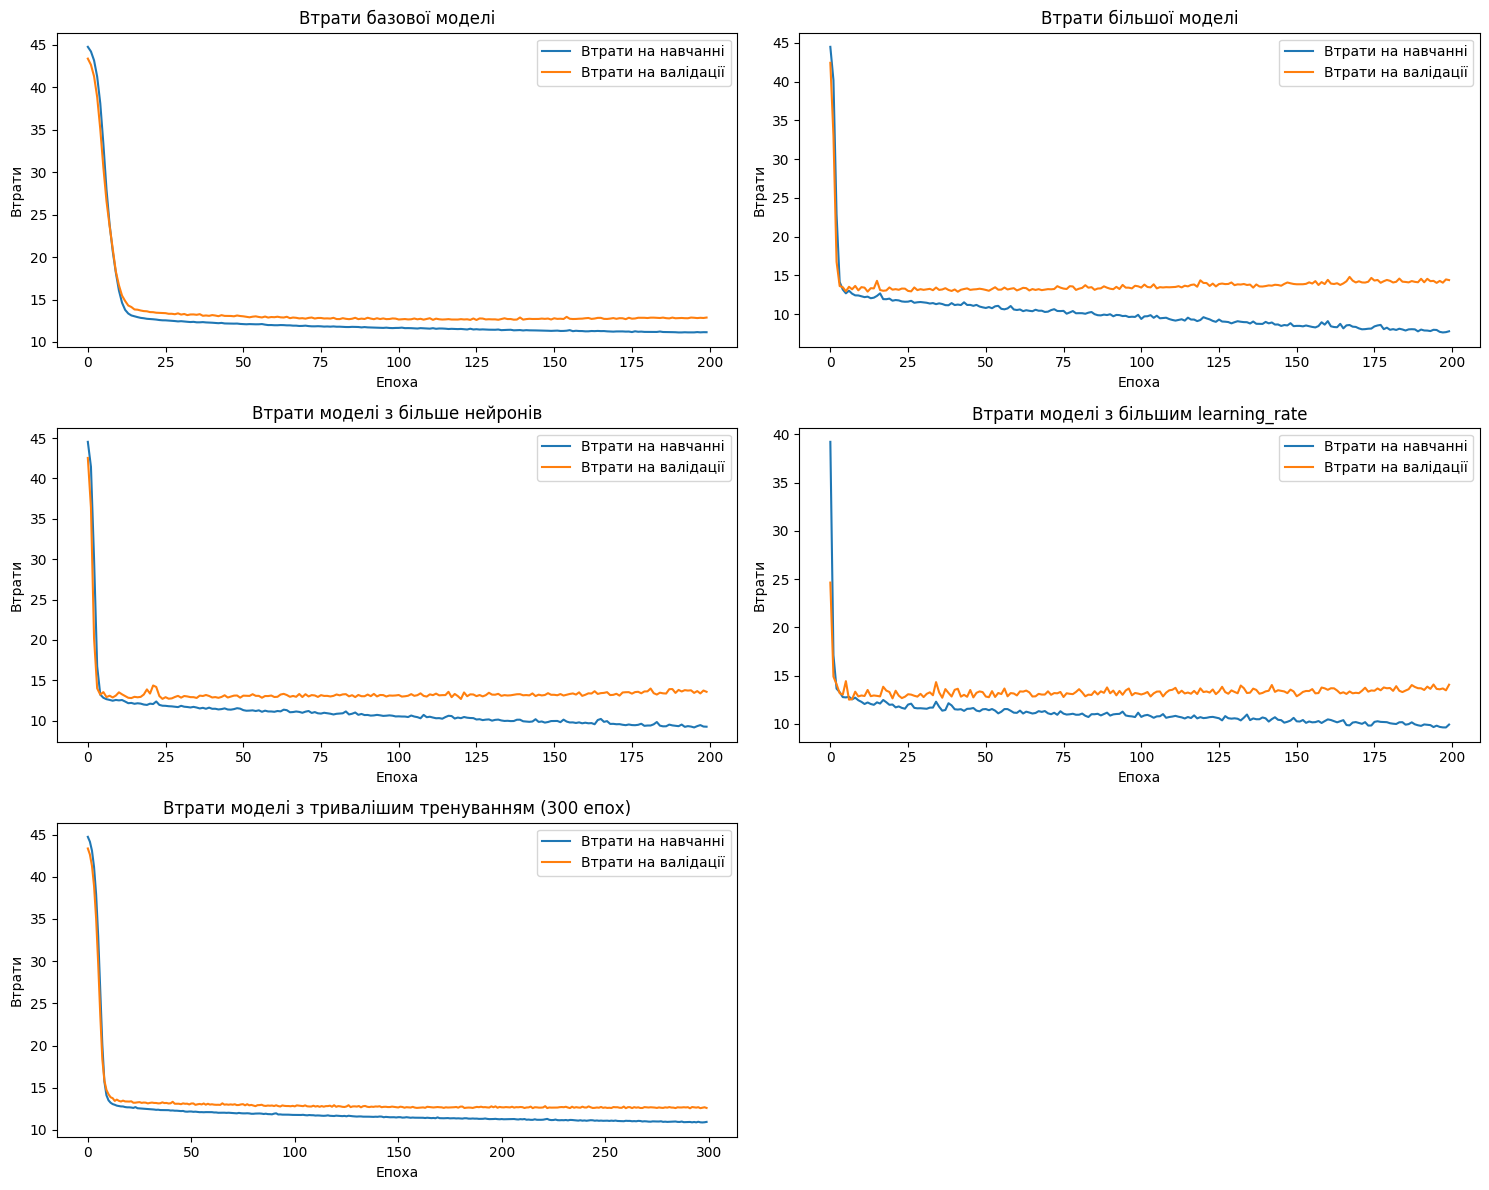

In [16]:
import matplotlib.pyplot as plt

# Побудова графіків функції втрат для базової моделі
plt.figure(figsize=(15, 12))

# Графіки для базової моделі
plt.subplot(3, 2, 1)
plt.plot(history.history['loss'], label='Втрати на навчанні')
plt.plot(history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати базової моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графіки для більшої моделі
plt.subplot(3, 2, 2)
plt.plot(larger_history.history['loss'], label='Втрати на навчанні')
plt.plot(larger_history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати більшої моделі')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графіки для моделі з більше нейронів
plt.subplot(3, 2, 3)
plt.plot(more_neurons_history.history['loss'], label='Втрати на навчанні')
plt.plot(more_neurons_history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі з більше нейронів')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графіки для моделі з більшим learning_rate
plt.subplot(3, 2, 4)
plt.plot(larger_learning_rate_history.history['loss'], label='Втрати на навчанні')
plt.plot(larger_learning_rate_history.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі з більшим learning_rate')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Графіки для моделі з тривалішим тренуванням (300 епох)
plt.subplot(3, 2, 5)
plt.plot(history_300_epochs.history['loss'], label='Втрати на навчанні')
plt.plot(history_300_epochs.history['val_loss'], label='Втрати на валідації')
plt.title('Втрати моделі з тривалішим тренуванням (300 епох)')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()

# Відображення графіків
plt.tight_layout()
plt.show()
